<a href="https://colab.research.google.com/github/mauroamnirati/challenge-telecomx/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import requests
import json

In [2]:
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos_clientes = requests.get(url_api)
resultado = json.loads(datos_clientes.text)

In [3]:
import pandas as pd
datos_clientes_normalizado = pd.json_normalize(resultado)
datos_clientes_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
datos_clientes_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## Valores nulos por columna

In [5]:
datos_clientes_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## Número de filas duplicadas

In [6]:
datos_clientes_normalizado.duplicated().sum()

np.int64(0)

## Comprobación de inconsistencias en columnas

In [7]:
datos_clientes_normalizado["customer.SeniorCitizen"].unique()

array([0, 1])

In [8]:
datos_clientes_normalizado["customer.SeniorCitizen"] = datos_clientes_normalizado["customer.SeniorCitizen"].replace({0: "No", 1: "Yes"})
datos_clientes_normalizado["customer.SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
datos_clientes_normalizado["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [10]:
filas_a_mantener = datos_clientes_normalizado["Churn"] != ""
datos_clientes_limpio = datos_clientes_normalizado[filas_a_mantener]
datos_clientes_limpio["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
datos_clientes_limpio

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Agregamos columna de cuentas diarias

In [12]:
df = datos_clientes_limpio.copy()

df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

df[['customerID', 'account.Charges.Monthly', 'Cuentas_Diarias']].head()

,customerID,account.Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


## Conversión de valores categóricos binarios a numéricos

In [17]:
# Identificar columnas con Yes/No
cols_yes_no = [col for col in df.columns if df[col].isin(['Yes','No']).any()]

# Reemplazar por 1 y 0
df[cols_yes_no] = df[cols_yes_no].replace({'Yes':1, 'No':0})
df.tail()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667
7266,9995-HOTOH,0,Male,0,1,1,63,0,No phone service,DSL,...,1,0,1,1,Two year,0,Electronic check,59.00,3707.6,1.966667


## Renombrar columnas para mayor claridad

In [16]:
df = df.rename(columns={
    'customerID': 'customer_id',
    'Churn': 'churn',
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'senior_citizen',
    'customer.Partner': 'partner',
    'customer.Dependents': 'dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'phone_service',
    'phone.MultipleLines': 'multiple_lines',
    'internet.InternetService': 'internet_service',
    'internet.OnlineSecurity': 'online_security',
    'internet.OnlineBackup': 'online_backup',
    'internet.DeviceProtection': 'device_protection',
    'internet.TechSupport': 'tech_support',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_movies',
    'account.Contract': 'contract',
    'account.PaperlessBilling': 'paperless_billing',
    'account.PaymentMethod': 'payment_method',
    'account.Charges.Monthly': 'monthly_charges',
    'account.Charges.Total': 'total_charges',
    'Cuentas_Diarias': 'daily_charges'  # la que agregamos
})
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


## Estandarización de texto en snake_case

In [18]:
# Pasar todo a minúsculas
df['gender'] = df['gender'].str.lower()   # male / female

# Contract: reemplazar espacios y guiones por _
df['contract'] = df['contract'].str.replace(" ", "_").str.replace("-", "_").str.lower()

# Payment method también
df['payment_method'] = df['payment_method'].str.replace(" ", "_").str.replace("-", "_").str.lower()
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0002-ORFBO,0,female,0,1,1,9,1,0,DSL,...,0,1,1,0,one_year,1,mailed_check,65.6,593.3,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,DSL,...,0,0,0,1,month_to_month,0,mailed_check,59.9,542.4,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,month_to_month,1,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,month_to_month,1,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,month_to_month,1,mailed_check,83.9,267.4,2.796667


#📊 Carga y análisis

## Resumen general de variables numéricas

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
senior_citizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
partner,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
dependents,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
phone_service,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
paperless_billing,7043.0,0.592219,0.491457,0.000000,0.000000,1.000,1.000,1.000000
monthly_charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
daily_charges,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333


## Resumen de variables categóricas

In [24]:
df.describe(include=['object']).T

,count,unique,top,freq
customer_id,7043,7043,9995-HOTOH,1
gender,7043,2,male,3555
multiple_lines,7043,3,0,3390
internet_service,7043,3,Fiber optic,3096
online_security,7043,3,0,3498
online_backup,7043,3,0,3088
device_protection,7043,3,0,3095
tech_support,7043,3,0,3473
streaming_tv,7043,3,0,2810
streaming_movies,7043,3,0,2785


## Visual complementario

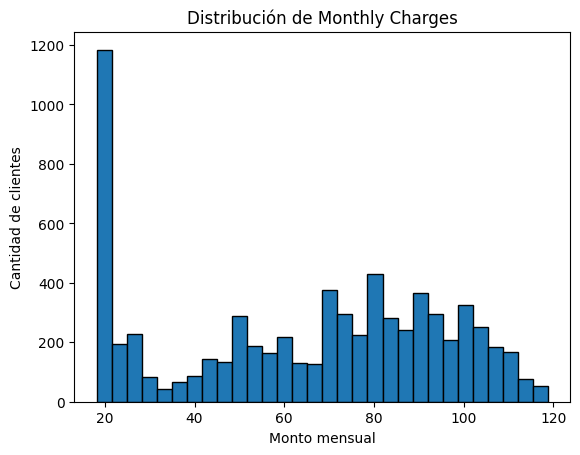

In [33]:
import matplotlib.pyplot as plt

df['monthly_charges'].hist(bins=30, edgecolor='black')
plt.title("Distribución de Monthly Charges")
plt.xlabel("Monto mensual")
plt.ylabel("Cantidad de clientes")
plt.grid(False)
plt.show()

## Conteo básico

In [37]:
# Conteo de clientes por churn
print(df['churn'].value_counts())

# Proporción
print(df['churn'].value_counts(normalize=True))

churn
0    5174
1    1869
Name: count, dtype: int64
churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


## Gráfico de barras

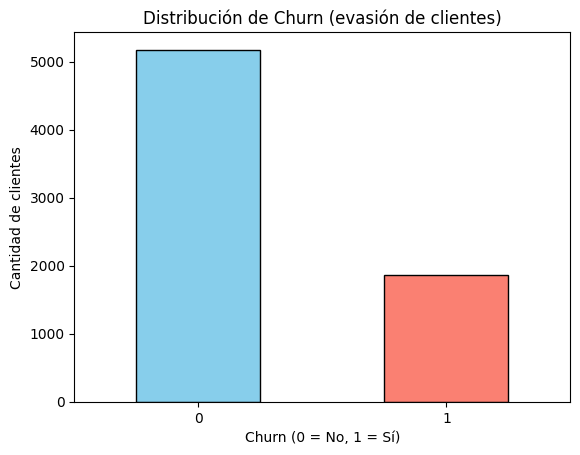

In [38]:
import matplotlib.pyplot as plt

df['churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')

plt.title("Distribución de Churn (evasión de clientes)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.show()

## Gráfico de torta

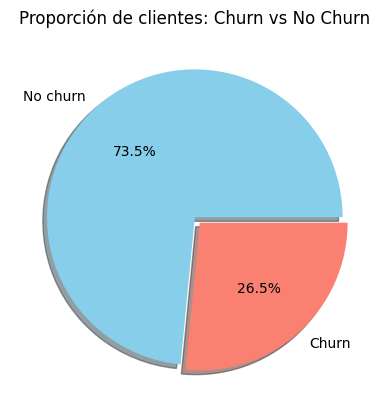

In [39]:
df['churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No churn','Churn'],
    colors=['skyblue','salmon'],
    explode=[0,0.05],  # resalta el churn
    shadow=True
)

plt.title("Proporción de clientes: Churn vs No Churn")
plt.ylabel("")  # quita el label lateral
plt.show()

## Tablas cruzadas (frecuencia absoluta y relativa)

In [40]:
# Ejemplo con contrato
pd.crosstab(df['contract'], df['churn'])

churn,0,1
contract,,
month_to_month,2220,1655
one_year,1307,166
two_year,1647,48


In [42]:
# En proporción
pd.crosstab(df['contract'], df['churn'], normalize='index') * 100

churn,0,1
contract,,
month_to_month,57.290323,42.709677
one_year,88.730482,11.269518
two_year,97.168142,2.831858


## Visualización con gráficos

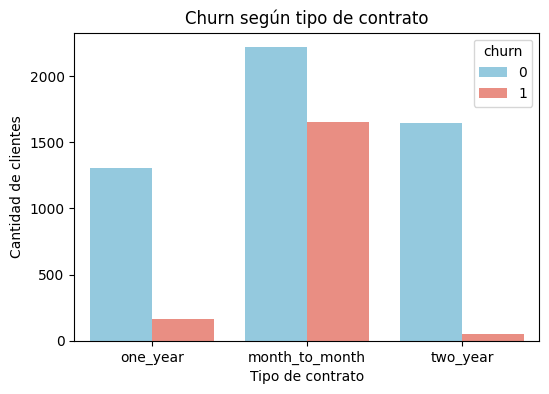

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='contract', hue='churn', palette=['skyblue','salmon'])
plt.title("Churn según tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Tipo de contrato")
plt.show()

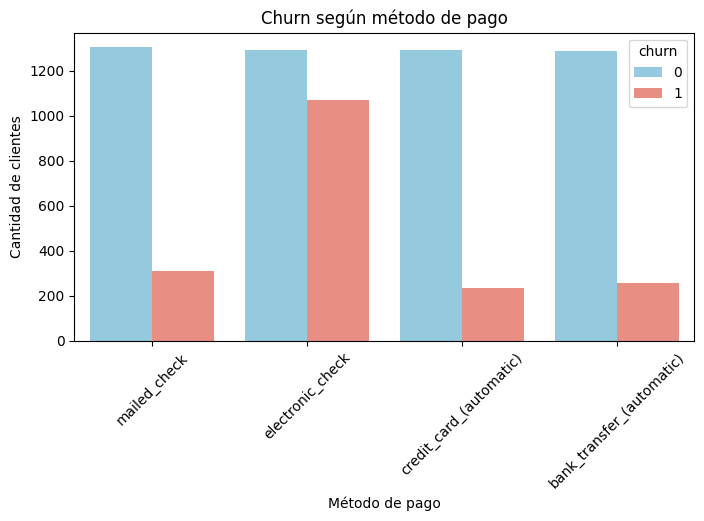

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='payment_method', hue='churn', palette=['skyblue','salmon'])
plt.title("Churn según método de pago")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Método de pago")
plt.xticks(rotation=45)
plt.show()

## Visualizaciones para variables numéricas

/tmp/ipython-input-64863367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='tenure', palette=['skyblue','salmon'])


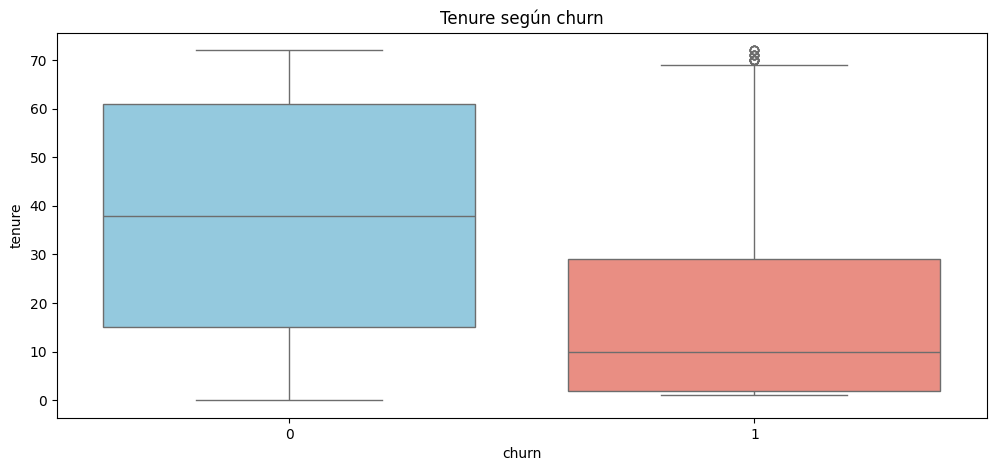

/tmp/ipython-input-64863367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='monthly_charges', palette=['skyblue','salmon'])


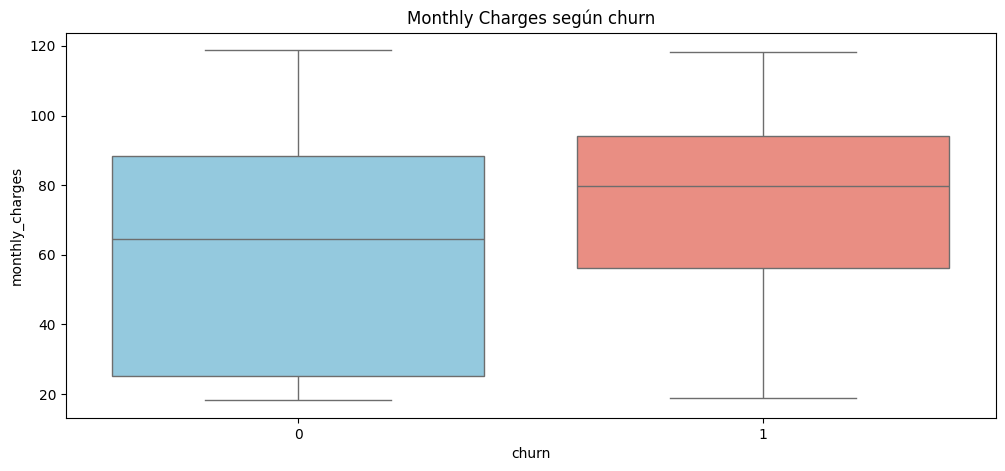

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='churn', y='tenure', palette=['skyblue','salmon'])
plt.title("Tenure según churn")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='churn', y='monthly_charges', palette=['skyblue','salmon'])
plt.title("Monthly Charges según churn")
plt.show()

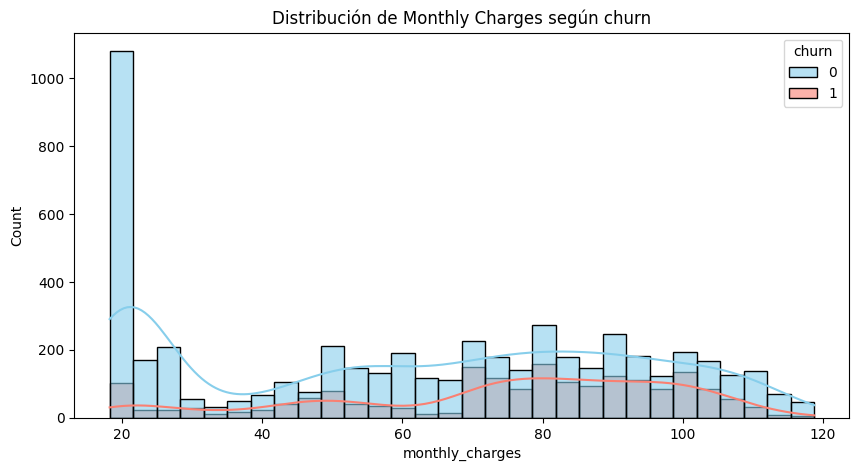

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='monthly_charges', hue='churn', bins=30, kde=True, palette=['skyblue','salmon'], alpha=0.6)
plt.title("Distribución de Monthly Charges según churn")
plt.show()

#📄Informe final